In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

In [2]:
# loading csv to dataframe df
df = pd.read_csv("Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
# finding shape of dataframe
df.shape

(13611, 17)

In [4]:
# getting information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
# finding null values in dataset
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There are no null values in the dataset so we can proceeed with the analysis.

In [6]:
# getting summary statistics of numeric features
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


We can see that the range of values for features like `Extent` and `Solidity` is quite small compared to those for columns like `Area` and `Perimeter`<br><br>Therefore, there is a need to normalize these feature values in order to equalize feature magnitudes for distance-based algorithms like KNN which we will use as well as to help with faster convergence for gradient descent (required for logistic regression) and to help with general model interpretability.

In [7]:
# getting summary statistics of object features
df.describe(include='object')

,Class
count,13611
unique,7
top,DERMASON
freq,3546


There are 7 unique class labels for the dependent variable `Class`

In [8]:
# getting unique values for the predictive variable
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [9]:
# taking value counts of Class feature
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

We can see a class imbalance with `DERMASON` and `SIRA` classes a very large number of data points whereas `BOMBAY` and `BARBUNYA` classes have very few datapoints.<br><br>
Class `DERMASON` has 7 times as many datapoints as `BOMBAY`.<br><br>
We should take this into account while calculating our performance metrics for our models.<br>
Also, it should be noted that Class `SIRA` is moderately poisonous.

In [10]:
# performing label encoding for our target vaiables
lc = LabelEncoder()
df['Class'] = lc.fit_transform(df['Class'])
df['Class'].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

After Label Encoding we see the that<br>
**Class 0** is `BARBUNYA`<br>
**Class 1** is `BOMBAY`<br>
**Class 2** is `CALI`<br>
**Class 3** is `DERMASON`<br>
**Class 4** is `HOROZ`<br>
**Class 5** is `SEKER`<br>
**Class 6** is `SIRA`<br>

In [11]:
# splitting the dataframe into independent and predictive variables
y = df['Class']
X = df.drop('Class', axis = 1)

In [12]:
# scaling the independent feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.4021726 ,
         1.92572347,  0.83837102],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089364,
         2.68970162,  0.77113831],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509111,
         1.84135576,  0.91675506],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920501,
         0.33632829,  0.39025106],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837456,
         0.2489734 ,  0.03644007],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777538,
        -0.27648141,  0.71371941]])

In [13]:
# performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (6805, 16) (6805,)
Test shape: (6806, 16) (6806,)


In [14]:
# initializing our KNN, Decision Tree, Logistic Regression, and Random Forest Classifiers
kNN = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()
lr = LogisticRegression(max_iter=500)
rf = RandomForestClassifier()

In [15]:
# fitting the models to the training data and finding their individual prediction values
cfrs = [kNN, tree, lr, rf]
for cfr in cfrs:
    cfr.fit(X_train, y_train)
kNN_pred = kNN.predict(X_test)
tree_pred = tree.predict(X_test)
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

In [16]:
# calculating the accuracy, precision, and recall for the KNN classifier
kNN_acc = round(accuracy_score(y_test, kNN_pred),3)
kNN_precision = round(precision_score(y_test, kNN_pred, average='weighted'),3)
kNN_recall = round(recall_score(y_test, kNN_pred, average='weighted'),3)
print('For KNN classifier:', 'Accuracy=', kNN_acc, ', Precision=', kNN_precision, ', Recall=', kNN_recall)

For KNN classifier: Accuracy= 0.916 , Precision= 0.917 , Recall= 0.916


So the KNN model gives Accuracy of 91.6%, a precision of 91.7%, and a recall of 91.6%

In [17]:
# defining a function to prettify confusion matrices
def create_confusion_matric(cm, labels):
    df = pd.DataFrame(cm, labels, labels)
    ax = sns.heatmap(df, annot=True, annot_kws={'size': 10}, square=True, cbar=False, fmt='.2f', cmap='Blues', linewidths=0.5, linecolor='black')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

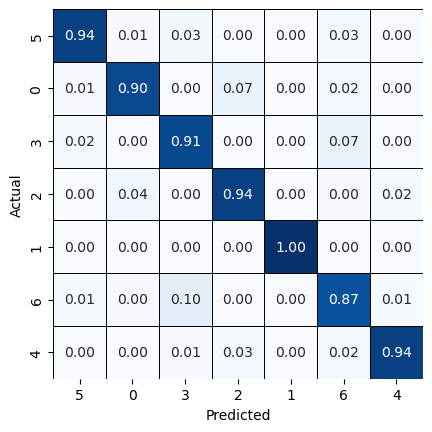

In [18]:
# creating confusion matrix for KNN classifier results
labels = y_test.unique()
cm = confusion_matrix(y_test, kNN_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [19]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, kNN_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       671
           1       1.00      1.00      1.00       258
           2       0.91      0.94      0.93       838
           3       0.90      0.91      0.91      1759
           4       0.96      0.94      0.95       942
           5       0.95      0.94      0.94      1013
           6       0.86      0.87      0.86      1325

    accuracy                           0.92      6806
   macro avg       0.93      0.93      0.93      6806
weighted avg       0.92      0.92      0.92      6806



From the confusion matrix and the classification report we can see that the precision and recall values for the poisonous class `SIRA` (Class 6)(=86% precision and =87% recall) is lowest. These values are highest for `BOMBAY` (Class1)(=100%).

In [20]:
# calculating the accuracy, precision, and recall for the Decision Tree classifier
tree_acc = round(accuracy_score(y_test, tree_pred),3)
tree_precision = round(precision_score(y_test, tree_pred, average='weighted'),3)
tree_recall = round(recall_score(y_test, tree_pred, average='weighted'),3)
print('For Decision Tree classifier:', 'Accuracy=', tree_acc, ', Precision=', tree_precision, ', Recall=', tree_recall)

For Decision Tree classifier: Accuracy= 0.886 , Precision= 0.886 , Recall= 0.886


So the Decision Tree model gives Accuracy of 88.9%, a precision of 88.9%, and a recall of 88.9%

These values are higher for the KNN model so that seems to be a better classifier than Decision Tree model.

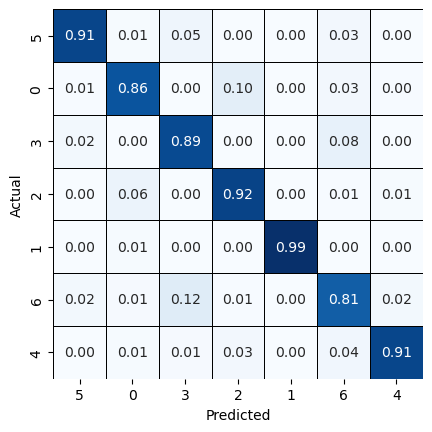

In [21]:
# creating confusion matrix for Decision Tree classifier results
cm = confusion_matrix(y_test, tree_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [22]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       671
           1       0.99      0.99      0.99       258
           2       0.87      0.92      0.90       838
           3       0.88      0.89      0.89      1759
           4       0.95      0.91      0.93       942
           5       0.92      0.91      0.92      1013
           6       0.83      0.81      0.82      1325

    accuracy                           0.89      6806
   macro avg       0.90      0.90      0.90      6806
weighted avg       0.89      0.89      0.89      6806



By looking at the confusion matrix and the classification report we are able to see that the model performs much worse than the KNN model by giving lower values of precision and recall across all classes but the general trend of the poisonous Class 6 - `SIRA` having the lowest values of precision and recall continues.

In [23]:
# calculating the accuracy, precision, and recall for the Logistic Regression classifier
lr_acc = round(accuracy_score(y_test, lr_pred),3)
lr_precision = round(precision_score(y_test, lr_pred, average='weighted'),3)
lr_recall = round(recall_score(y_test, lr_pred, average='weighted'),3)
print('For Logistic Regression classifier:', 'Accuracy=', lr_acc, ', Precision=', lr_precision, ', Recall=', lr_recall)

For Logistic Regression classifier: Accuracy= 0.925 , Precision= 0.926 , Recall= 0.925


So the Logistic Regression model gives Accuracy of 92.5%, a precision of 92.6%, and a recall of 92.5%

The Logistic Regression model outperforms the KNN and Decison Tree classifier.

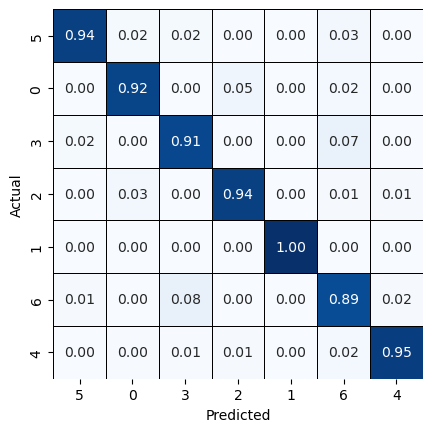

In [24]:
# creating confusion matrix for Logistic Regression classifier results
cm = confusion_matrix(y_test, lr_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [25]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       671
           1       1.00      1.00      1.00       258
           2       0.94      0.94      0.94       838
           3       0.93      0.91      0.92      1759
           4       0.96      0.95      0.96       942
           5       0.95      0.94      0.94      1013
           6       0.85      0.89      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.94      0.94      0.94      6806
weighted avg       0.93      0.92      0.93      6806



Even though the Logistic Regression model gives higher precision and recall values for the classes the results obtained for the venomous class 6 `SIRA` are still significantly lower than those for other classes.

In [26]:
# calculating the accuracy, precision, and recall for the Random Forest classifier
rf_acc = round(accuracy_score(y_test, rf_pred),3)
rf_precision = round(precision_score(y_test, rf_pred, average='weighted'),3)
rf_recall = round(recall_score(y_test, rf_pred, average='weighted'),3)
print('For Random Forest classifier:', 'Accuracy=', rf_acc, ', Precision=', rf_precision, ', Recall=', rf_recall)

For Random Forest classifier: Accuracy= 0.923 , Precision= 0.923 , Recall= 0.923


So the Random Forest model gives Accuracy of 92.3%, a precision of 92.4%, and a recall of 92.3%

So the Logistic Regression and Random Forest are the best 2 classifiers for this dataset.

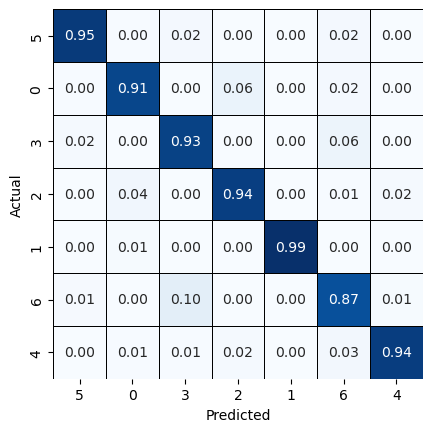

In [27]:
# creating confusion matrix for Random Forest classifier results
cm = confusion_matrix(y_test, rf_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [28]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       671
           1       1.00      0.99      1.00       258
           2       0.93      0.94      0.93       838
           3       0.91      0.93      0.92      1759
           4       0.97      0.94      0.95       942
           5       0.95      0.95      0.95      1013
           6       0.87      0.87      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.94      0.93      0.93      6806
weighted avg       0.92      0.92      0.92      6806



The same trend of Class 6 `SIRA` having the lowest precision and recall value compared to the other classes persists even with the Random Forest Classifier.

We have the situation where Class 6 `SIRA` is poisonous so we want to be reduce the misclassifications associated with this class. For this we have to choose between precision and recall as the metric that we want to improve.<br>
1) When we prioritise Precision metric we are trying to reduce the the number of False Positives i.e., the number of non-poisonous beans that get classified as being poisonous. Higher False Positives cause a false alarm for cases when a 'safe' bean gets classified as poisonous.<br>
2) When we prioritise the Recall metric we are trying to reduce the number of False Negatives i.e., the number of poisonous SIRA beans that get classified as non-poisonous. Higher False Negatives can result in poisonous beans entering the market that can result in hospitalizations and other health concerns for the consumers<br><br>
We can clearly see that the 2nd situation is much worse so we will focus on improving the Recall score for Class 6 for our models.

To balance the number of entries in each class we will perform Under Sampling first. As the dataset is not that big we are not expecting great results from this. 

**Under Sampling**

In [29]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

In [30]:
X_train_res.shape, y_train_res.shape

((1848, 16), (1848,))

In [31]:
lr.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=500)

In [32]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [33]:
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

In [34]:
# calculating the accuracy, precision, and recall for the Logistic Regression classifier
lr_acc = round(accuracy_score(y_test, lr_pred),3)
lr_precision = round(precision_score(y_test, lr_pred, average='weighted'),3)
lr_recall = round(recall_score(y_test, lr_pred, average='weighted'),3)
print('For Logistic Regression classifier:', 'Accuracy=', lr_acc, ', Precision=', lr_precision, ', Recall=', lr_recall)

For Logistic Regression classifier: Accuracy= 0.919 , Precision= 0.92 , Recall= 0.919


Prior to undersampling the logistic regression gave a better Recall value (=92.5%) than this model.

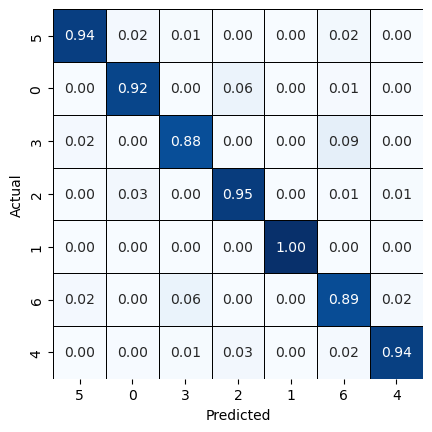

In [35]:
# creating confusion matrix for Logistic Regression classifier results
cm = confusion_matrix(y_test, lr_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [36]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       671
           1       1.00      1.00      1.00       258
           2       0.92      0.95      0.94       838
           3       0.94      0.88      0.91      1759
           4       0.96      0.94      0.95       942
           5       0.93      0.94      0.94      1013
           6       0.84      0.89      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.93      0.93      0.93      6806
weighted avg       0.92      0.92      0.92      6806



The recall value for class 6 hasn't improved from 89%.

In [37]:
rf_acc = round(accuracy_score(y_test, rf_pred),3)
rf_precision = round(precision_score(y_test, rf_pred, average='weighted'),3)
rf_recall = round(recall_score(y_test, rf_pred, average='weighted'),3)
print('For Random Forest classifier:', 'Accuracy=', rf_acc, ', Precision=', rf_precision, ', Recall=', rf_recall)

For Random Forest classifier: Accuracy= 0.915 , Precision= 0.916 , Recall= 0.915


Prior to undersampling the Random Forest model gave a higher recall value(=92.3%).

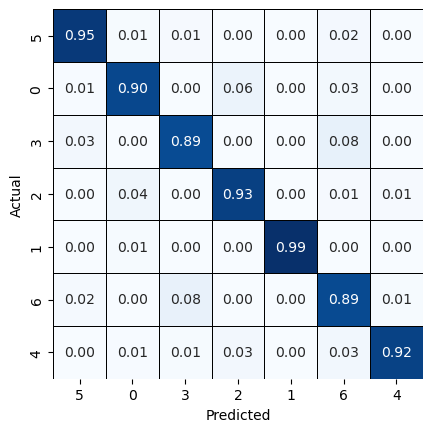

In [38]:
cm = confusion_matrix(y_test, rf_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [39]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       671
           1       1.00      0.99      1.00       258
           2       0.92      0.93      0.92       838
           3       0.93      0.89      0.91      1759
           4       0.96      0.92      0.94       942
           5       0.93      0.95      0.94      1013
           6       0.84      0.89      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.93      0.93      0.93      6806
weighted avg       0.92      0.92      0.92      6806



The recall value for Class 6 for the Random Forest model has improved to 89% after undersampling.

Now we will attempt to perform the technique of oversampling in order to combat class imbalance.

**Random Over Sampling**

In [40]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_res, y_train_res = oversampler.fit_resample(X_train, y_train)

In [41]:
X_train_res.shape, y_train_res.shape

((12509, 16), (12509,))

In [42]:
lr.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=500)

In [43]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [44]:
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

In [45]:
# calculating the accuracy, precision, and recall for the Logistic Regression classifier
lr_acc = round(accuracy_score(y_test, lr_pred),3)
lr_precision = round(precision_score(y_test, lr_pred, average='weighted'),3)
lr_recall = round(recall_score(y_test, lr_pred, average='weighted'),3)
print('For Logistic Regression classifier:', 'Accuracy=', lr_acc, ', Precision=', lr_precision, ', Recall=', lr_recall)

For Logistic Regression classifier: Accuracy= 0.92 , Precision= 0.922 , Recall= 0.92


We are able to see that on performing Over Sampling the overall recall reduces to 92% from 92.5%

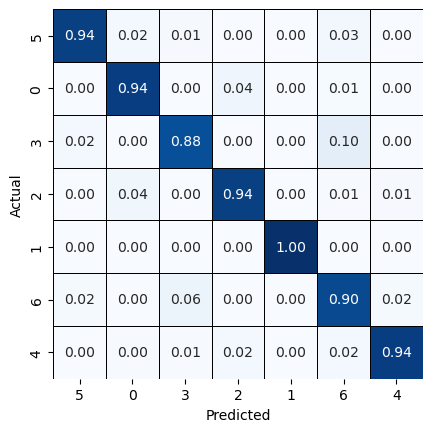

In [46]:
# creating confusion matrix for Logistic Regression classifier results
cm = confusion_matrix(y_test, lr_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [47]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       671
           1       1.00      1.00      1.00       258
           2       0.94      0.94      0.94       838
           3       0.94      0.88      0.91      1759
           4       0.96      0.94      0.95       942
           5       0.94      0.94      0.94      1013
           6       0.83      0.90      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.93      0.94      0.93      6806
weighted avg       0.92      0.92      0.92      6806



We observe that on performing oversampling the recall value for Class 6 increases to 90% for the Logistic Regression model.

In [48]:
rf_acc = round(accuracy_score(y_test, rf_pred),3)
rf_precision = round(precision_score(y_test, rf_pred, average='weighted'),3)
rf_recall = round(recall_score(y_test, rf_pred, average='weighted'),3)
print('For Random Forest classifier:', 'Accuracy=', rf_acc, ', Precision=', rf_precision, ', Recall=', rf_recall)

For Random Forest classifier: Accuracy= 0.922 , Precision= 0.922 , Recall= 0.922


The overall recall value for the Random Forest model increases to 92.4%

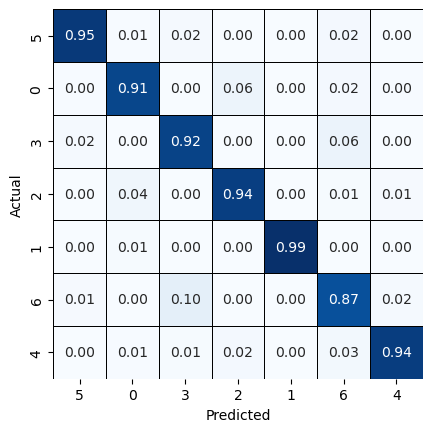

In [49]:
cm = confusion_matrix(y_test, rf_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [50]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       671
           1       1.00      0.99      1.00       258
           2       0.93      0.94      0.93       838
           3       0.92      0.92      0.92      1759
           4       0.96      0.94      0.95       942
           5       0.95      0.95      0.95      1013
           6       0.87      0.87      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.93      0.93      0.93      6806
weighted avg       0.92      0.92      0.92      6806



We observe that despite oversampling the recall value for Class 6 remains 87% for the Random Forest model.

**SMOTE and Tomek**

SMOTETomek combines oversampling using SMOTE and undersampling using Tomek links in order to get a balanced dataset.

In [51]:
from imblearn.combine import SMOTETomek

In [52]:
os=SMOTETomek(random_state=42)
X_train_res,y_train_res = os.fit_resample(X_train,y_train)

In [53]:
lr.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=500)

In [54]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [55]:
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

In [56]:
# calculating the accuracy, precision, and recall for the Logistic Regression classifier
lr_acc = round(accuracy_score(y_test, lr_pred),3)
lr_precision = round(precision_score(y_test, lr_pred, average='weighted'),3)
lr_recall = round(recall_score(y_test, lr_pred, average='weighted'),3)
print('For Logistic Regression classifier:', 'Accuracy=', lr_acc, ', Precision=', lr_precision, ', Recall=', lr_recall)

For Logistic Regression classifier: Accuracy= 0.921 , Precision= 0.923 , Recall= 0.921


Using SMOTE-Tomek the overall recall value for the Logistic Regression drops to 92.1% which is higher compared to that achieved using just Random Over Sampling.

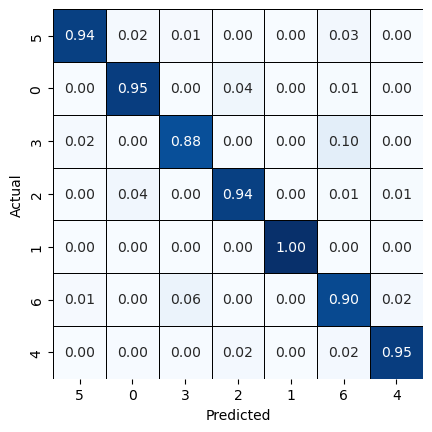

In [57]:
# creating confusion matrix for Logistic Regression classifier results
cm = confusion_matrix(y_test, lr_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [58]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       671
           1       1.00      1.00      1.00       258
           2       0.94      0.94      0.94       838
           3       0.94      0.88      0.91      1759
           4       0.96      0.95      0.95       942
           5       0.95      0.94      0.94      1013
           6       0.83      0.90      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.93      0.94      0.93      6806
weighted avg       0.92      0.92      0.92      6806



Using SMOTE-Tomek the recall value for Class 6 increases to 90% which is same as the result achieved for the Logistic Regression model by performing oversampling.

In [59]:
rf_acc = round(accuracy_score(y_test, rf_pred),3)
rf_precision = round(precision_score(y_test, rf_pred, average='weighted'),3)
rf_recall = round(recall_score(y_test, rf_pred, average='weighted'),3)
print('For Random Forest classifier:', 'Accuracy=', rf_acc, ', Precision=', rf_precision, ', Recall=', rf_recall)

For Random Forest classifier: Accuracy= 0.922 , Precision= 0.923 , Recall= 0.922


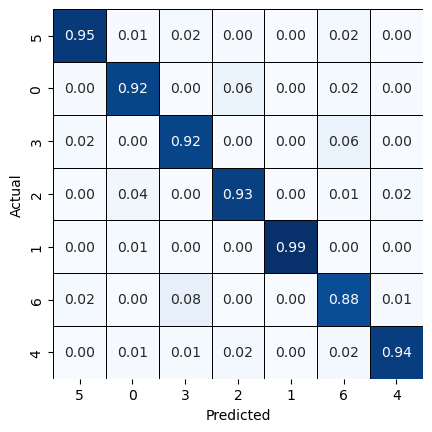

In [60]:
cm = confusion_matrix(y_test, rf_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [61]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       671
           1       1.00      0.99      1.00       258
           2       0.92      0.93      0.93       838
           3       0.92      0.92      0.92      1759
           4       0.95      0.94      0.95       942
           5       0.95      0.95      0.95      1013
           6       0.87      0.88      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.93      0.93      0.93      6806
weighted avg       0.92      0.92      0.92      6806



Using SMOTE-Tomek the recall value for Class 6 increases to 88% which is higher than the result achieved for the Random Forest model by performing oversampling.

**Random Forest Class Weight Parameter**

Finally, we will modify the class_weight parameter for the Random Forest model to handle the class imbalance. By putting class weight to `balanced` we are adjusting the class weights inversely proportional to the class frequencies in the training data.

In [62]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_test), y=y_test)

rf = RandomForestClassifier(class_weight={i: w for i, w in enumerate(class_weights)})
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.4490100063870555,
                                     1: 3.768549280177187,
                                     2: 1.1602454824411865,
                                     3: 0.5527491269390076,
                                     4: 1.032150439793752,
                                     5: 0.9598082075870822,
                                     6: 0.7338005390835579})

We can see that Class 1 `BOMBAY`got the highest weight as it had the lowest number of class frequencies in the training data.

In [63]:
rf_pred = rf.predict(X_test)

In [64]:
rf_acc = round(accuracy_score(y_test, rf_pred),3)
rf_precision = round(precision_score(y_test, rf_pred, average='weighted'),3)
rf_recall = round(recall_score(y_test, rf_pred, average='weighted'),3)
print('For Random Forest classifier:', 'Accuracy=', rf_acc, ', Precision=', rf_precision, ', Recall=', rf_recall)

For Random Forest classifier: Accuracy= 0.921 , Precision= 0.921 , Recall= 0.921


Using balanced class weights the Random Forest model gives the same recall value as the orignal Random Forest model.

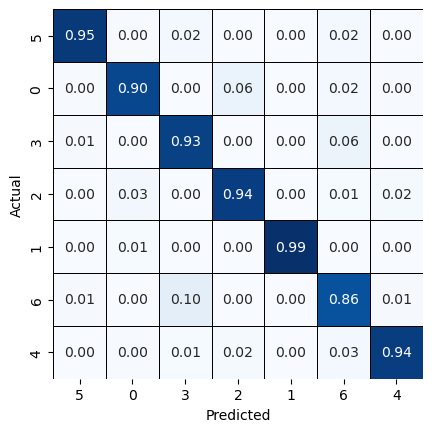

In [65]:
cm = confusion_matrix(y_test, rf_pred, labels = labels, normalize='true')
create_confusion_matric(cm, labels)

In [66]:
# printing the classification report for model to see precision-recall values for individual classes
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       671
           1       1.00      0.99      1.00       258
           2       0.92      0.94      0.93       838
           3       0.90      0.93      0.91      1759
           4       0.96      0.94      0.95       942
           5       0.95      0.95      0.95      1013
           6       0.87      0.86      0.87      1325

    accuracy                           0.92      6806
   macro avg       0.93      0.93      0.93      6806
weighted avg       0.92      0.92      0.92      6806



We observe that the recall value for Class 6 reduces for the Random Forest model with balanced class weights compared to orignal random forest model.

**Conclusion-** The Logistic Regression model fitted on data treated with SMOTETomek techniques to handle class imbalances is the best model which gives the highest recall value for the poisonous Class 6 `SIRA`(=90%) while giving the overall metrics = Accuracy= 0.921 , Precision= 0.923 , Recall= 0.921